In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [29]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [4]:
train = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/train.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/test.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/age_gender_info.csv')

In [38]:
print(train.info())
print('===============================================')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   int32  
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [37]:
print(train.isnull().sum())
print('===============================================')
print(test.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64
단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류

In [25]:
print(np.sort(train['지역'].unique()))
print(np.sort(test['지역'].unique()))

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']
['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '세종특별자치시'
 '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


<AxesSubplot:>

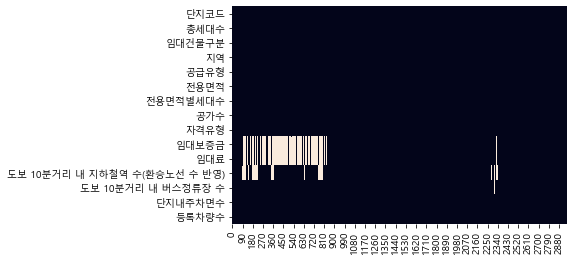

In [31]:
plt.figure(facecolor='white')

sns.heatmap(train.isnull().T, cbar=False)

In [13]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
grouped

In [11]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group(('C2411', '아파트', '경상남도', '국민임대'))

group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,A,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [10]:
test.loc[196, "자격유형"] = 'A'

In [14]:
test.loc[test['자격유형'].isnull()]

group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [19]:
test.loc[ 258, "자격유형"] = 'C'
# test.loc[test['자격유형'].isnull()]

In [20]:
print(train['자격유형'].unique())
print(test['자격유형'].unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
['H' 'A' 'E' 'C' 'D' 'G' 'I' 'J' 'K' 'L' 'M' 'N']


In [32]:
mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5,
           'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
           'K':11, 'L':12, 'M':13, 'N':14, 'O':15}

train['자격유형'] =train['자격유형'].map(mapping).astype(int)
test['자격유형'] =test['자격유형'].map(mapping).astype(int)

In [33]:
sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수',  '단지내주차면수', '자격유형']

X_train = train[sel]
X_test = test[sel]
y_train = train['등록차량수']

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=1, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [35]:
test['등록차량수'] = pred
test['단지별차량수평균'] = test.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,단지별차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,8,22830000,189840,0.0,2.0,683.0,617.45,633.983750
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,8,22830000,189840,0.0,3.0,1216.0,1326.24,1346.485556
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,1,19706000,156200,0.0,16.0,547.0,641.40,645.862222
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,1,14418000,108130,0.0,3.0,543.0,557.96,559.305000
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,8,28598000,203050,0.0,2.0,1112.0,1202.79,1206.192500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,996,C2456,349,아파트,제주특별자치도,국민임대,26.44,24,17.0,8,6992000,117000,0.0,4.0,270.0,226.47,233.892500
146,1000,C1266,596,아파트,충청북도,국민임대,26.94,164,35.0,8,8084000,149910,0.0,1.0,593.0,496.69,497.760000
147,1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,3,-,-,0.0,1.0,40.0,37.24,37.600000
148,1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,8,6882000,104370,0.0,1.0,467.0,449.75,450.430909


In [36]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df.to_csv('second_rf_0712.csv', index=False)
sub_df.head()

,code,num
0,C1072,633.983750
1,C1128,1346.485556
2,C1456,645.862222
3,C1840,559.305000
4,C1332,1206.192500


---

---

In [41]:
### 아파트 : 1, 상가 : 2
train['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

1. 임대건물 구분을 라벨링
2. 서울을 제외하고 나머지 지역을 라벨링
3. 